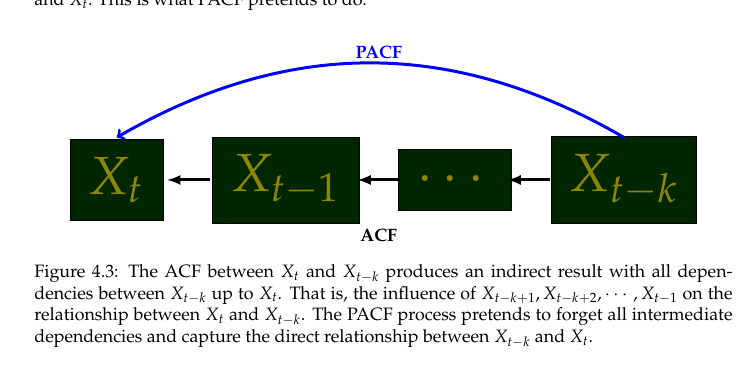



A mi el PACF ME DIO MUY DURO, Despues de mucho pensar pense en el problema de abajo hacia arriba. De cero para adelante.
Notacion: $P_k$ (el coeficiente $k$), otros usan $\phi_{kk}$.






* caso $P_0$. No hay nada entre $P_0$ y $P_0$, entonces $P_0=\rho_0= \sigma^2/\sigma^2 = 1 $. 
* caso $P_1$ no hay intermedios entre $P_0, P_1$ o sea que es lo mismo  $P_1 = \gamma_1/\gamma_0 = \gamma_1/\sigma^2 =\rho_1$.
* $P_2$: Este es el primer caso interesante. 

$$ X_t, X_{t-1}, X_{t-2}$$.

Necesitamos hacer regresion entre $X_t, X_{t-1}$, remover
la componente de $X_{t-1}$  y la remocion la llamanos $Y_t$.

$$\hat{X}_t = \alpha_1 + \alpha_2 X_{t-1} $$

Llamamos

$$ Y_t = X_{t} - \hat{X}_t $$

Aca no para la cosa. Vamos de atras hacia adelante
$X_{t-2}, X_{t-1}, X_t$.
Buscamos la (regresion lineal) entre $X_{t-2}$ y $X_{t-1}$.

$$\hat{X}_{t-2} = \beta_1 + \beta_2 X_{t-1} $$

Defino $$ Y_{t-2} = X_{t-2} - \hat{X}_{t-2} $$

Don esto defino:

$$ P_2 = \frac{\textrm{Cov}(Y_t, Y_{t-2})}{\sqrt{\mathbb{V}[Y_t] \mathbb{V}[Y_{t-2}]}}  =\frac{\textrm{Cov}(X_{t} - \hat{X}_t, Y_{t-2})}{\sqrt{\mathbb{V}[X_{t} - \hat{X}_t] \mathbb{V}[X_{t-2} - \hat{X}_{t-2}]}} $$

* Caso general $k > 2$, $P_k$.

Tenemos dos listas (hacia adelante y hacia atras)

$$X_t \rightarrow X_{t-1} \rightarrow \cdots X_{t-k-1} \rightarrow X_{t-k} $$

$$X_{t-k} \rightarrow X_{t-k+1} \rightarrow \cdots X_{t-1} \rightarrow X_t $$

Los pasos son los siguientes:

$$\hat{X}_t= \alpha_0 + \alpha_1 X_{t-1} + \alpha_2 X_{t-2} + \cdots \alpha_{k-1} X_{t-k+1} $$

$$\hat{X_{t-k}} = \beta_0 + \beta_1 X_{t-1} + \beta_2 X_{t-2} + \cdots + \beta_{k-1} X_{t-k+1}  $$

Calculo los residuales $Y$

$$ Y_t =  X_t - \hat{X}_t  $$
$$ Y_{t-k} = X_{t-k} - \hat{X}_{t-k} $$

$$ P_k = \frac{\textrm{Cov}(Y_t, Y_{t-k})}{\sqrt{\mathbb{V}[Y_t] \mathbb{V}[Y_{t-k}]}}  =\frac{\textrm{Cov}(X_{t} - \hat{X}_t, Y_{t-k})}{\sqrt{\mathbb{V}[X_{t} - \hat{X}_t] \mathbb{V}[X_{t-k} - \hat{X}_{t-k}]}} $$

Como se puede calcular esto:

\begin{eqnarray}
  P_k  = 
  \frac{ \det
    \begin{pmatrix}
      1 & \rho_1 & \rho_2 & \cdots & \rho_{{k}-2} & \rho_{1}  \\
      \rho_1 & 1 & \rho_1 & \cdots & \rho_{{k}-3} & \rho_{2}  \\
      \vdots &  & & \cdots &  & \vdots \\
      \vdots &  &  & \cdots &  & \vdots \\
      \rho_{{k}-2} & \rho_{{k}-3} & \rho_{{k}-4} & \cdots & 
      1 & \rho_{k-1} \\
      \rho_{{k}-1} & \rho_{{k}-2} & \rho_{{k}-3} & \cdots & 
      \rho_1 & \rho_k \\
    \end{pmatrix}
  }
  {
    \det 
    \begin{pmatrix}
      1 & \rho_1 & \rho_2 & \cdots & \rho_{{k}-2} & \rho_{{k}-1}  \\
      \rho_1 & 1 & \rho_1 & \cdots & \rho_{{k}-3} & \rho_{{k}-2}  \\
      \vdots &  &  & \cdots &  & \vdots \\
      \vdots &  &  & \cdots &  & \vdots \\
      \rho_{{k}-2} & \rho_{{k}-3} & \rho_{{k}-4} & \cdots & 
      1 & \rho_1 \\
      \rho_{{k}-1} & \rho_{{k}-2} & \rho_{{k}-3} & \cdots & 
      \rho_1 & 1 \\
    \end{pmatrix}
  }
\end{eqnarray}


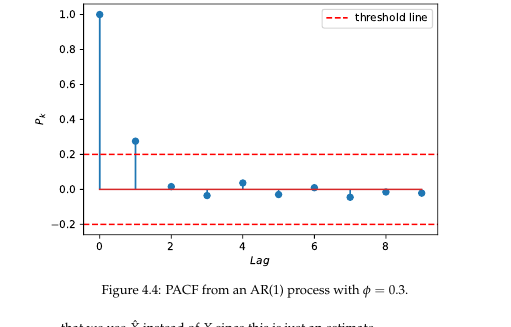

## Programa en Python para obtener el PACF de una serie de tiempo

In [1]:
# 4 metodos distintos para obtener PACF
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# generemos ruido
np.random.seed(1)
mu, sigma=0,1
N=1000
Z = np.random.normal(mu, sigma, N)

phi=0.3
X=np.zeros(N)
X[0]=Z[0]

for t in range(1,N):
    X[t] = Z[t] + phi*X[t-1]





/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


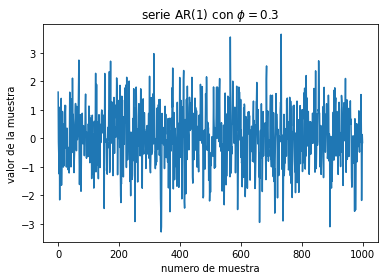

In [2]:
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("serie AR(1) con $\phi=0.3$")
plt.plot(X)

In [3]:
# encontrar la regresion multivariada entre X_t y X_{t-1}, X_{t-2}, \cdots X_{t-k+1}
# y X_{t-k} y X_{t-k+1}, X_{t-k+2}, \cdots X_{t-1}
# hallar los residuales Y_t, Y_{t-k}, restar los residuales
# hacer correlacion (Pearson)



def rhok(X, k, verbose=0):
    n=X.size
    Y=np.zeros( shape=(n), dtype='float') #inicializacion

    if k==0:
        return 1
    elif k==1:
        # necesitamos correlacionar X, X_{t-1}
        Y = X[1:]  # shift de 1 muestra
        X = X[:-1] # corta la ultima muestra

        correlacion = np.corrcoef(X,Y)[0,1]
        return correlacion
    else:
        k=k+1
        Y=np.zeros(shape=(k,n))
        Y[0]=X

        # asiganamos las demas columnas de Y
        for i in range(1,k):
            Y[i][:-i]=X[i:]  # cortamos los datos originales por i muestras

        # de X_0, ... --> X_1, X_2, hasta X_{t-k+1}
        # construir la matriz A, con unos en la primera columna
        # las ecuaciones normales y resolver

        # columna de unos
        unos = np.ones ( shape=(n,1), dtype='float')

        # stack unos
        Xmat = np.column_stack( (unos, Y[1]))  # inicializacion

        # los siguientes
        for i in range(2,k-1):
            # stack columnas
            Xmat = np.column_stack((Xmat, Y[i]))


        # Ax=b -->  x = (A^T A)^{-1} A^T b
        XT = Xmat.transpose() # Xmat transpuesta
        XTX = XT.dot(Xmat)  # A^T A
        XTXInv = np.linalg.inv(XTX) # (A^T A)^{-1}
        b = np.matmul(XT, Y[0])
        theta = XTXInv.dot(b)

        if verbose : print("theta primer paso", theta)


        # calcular los residuales
        Y_t = X - theta[0] - sum( theta[j]*Y[j] for j in range (1, k-1))

        # segunda parte la cadena al reves
        # de X_{k-1} ---> X_{t-k+1}, x_{t-k+2}, \cdots x_{t-1]}

        # columna de unos
        unos = np.ones ( shape=(n,1), dtype='float')
        # k-2 por que las columnas del medio
        Xmat = np.column_stack( (unos, Y[k-2]))

        for i in range(k-3, 0, -1):
            Xmat = np.column_stack((Xmat, Y[i]))

        # Ax=b -->  x = (A^T A)^{-1} A^T b
        XT = Xmat.transpose() # Xmat transpuesta
        XTX = XT.dot(Xmat)  # A^T A
        XTXInv = np.linalg.inv(XTX) # (A^T A)^{-1}
        b = np.matmul(XT, Y[0])
        theta = XTXInv.dot(b)

        if verbose: print("theta segundo pase", theta)


        # construyamos la regresion lineal
        Y_tk  = Y[k-1] - theta[0] - sum(theta[j]*Y[k-j-1] for j in range(1, k-1))

        correlacion = np.corrcoef(Y_t , Y_tk)[0,1]
        return correlacion




In [5]:
# calculamos el PACF

verbose=0
def PACF(X, M):
    global verbose
    rho = np.zeros(M)

    for i in range(M):
        rho[i] = rhok(X, i, verbose)
    return rho


# lo corremos y comparamos con statsmodels
M=10
rhostattools = np.zeros(M)
rhostattools = sm.tsa.stattools.pacf(X)[0:M]
print("rhostattoos=", rhostattools)

# pruebe el programa nuestro
rhomio = PACF(X,M)
print("rho=", rhomio)


rhostattoos= [ 1.          0.27538435  0.01583624 -0.03719044  0.04012105 -0.03225303
  0.01098701 -0.0495478  -0.01750214 -0.0237036 ]
rho= [ 1.          0.27544095  0.01555163 -0.03559264  0.03644572 -0.0297682
  0.00931544 -0.04525199 -0.01526096 -0.02170363]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

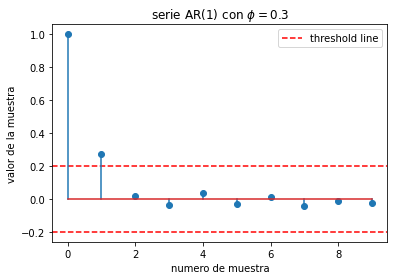

In [8]:
plt.axhline(y=0.2, color='r', linestyle='dashed')
plt.axhline(y=-0.2, color='r', linestyle='dashed', label='threshold line')
legend=plt.legend(loc='upper right')

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("serie AR(1) con $\phi=0.3$")
plt.stem(rhomio)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

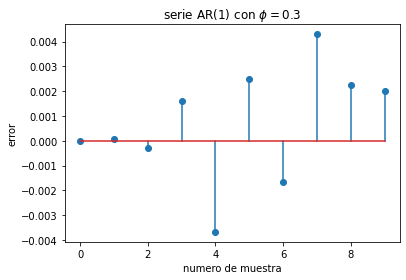

In [10]:
plt.xlabel("numero de muestra")
plt.ylabel("error")
plt.title("serie AR(1) con $\phi=0.3$")
plt.stem(rhomio-rhostattools)


## Calculo de PACF con determinantes

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


<StemContainer object of 3 artists>

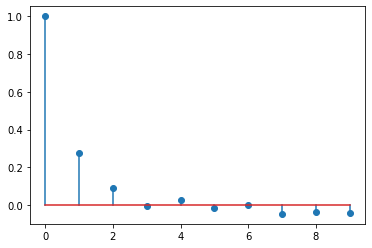

In [16]:
# funcion para calcular P_k
import numpy as np
M=10
P=np.zeros(M)

rho= sm.tsa.acf(X)[0:M]
plt.stem(rho)

In [17]:
P[0]=rho[0]
P[1]=rho[1]

# construimos las matrices
for k in range(2, M):
    A = np.zeros( (k,k))
    B = np.zeros((k,k))

    # construimos A
    for i in range(k):
        for j in range(i, k-1):
            A[i,j]=rho[j-i]
            if i != j : A[j,i]=A[i,j]

    # la ultima columna
    for i in range(k-1):
        A[i, k-1] = rho[i+1]

    # la ultima fila
    for j in range(k-1):
        A[k-1, j] = rho[k-j-1]

    # print("Matriz A=", A)
    # print()

    # construimos la matriz B
    for i in range(k):
        for j in range(i, k):
            B[i,j] = rho[j-i]
            if i != j : B[j,i]=B[i,j]

    # print("Matriz B=", B)
    # print()

    P[k] = np.linalg.det(A)/np.linalg.det(B)

print(P)

    


[ 1.          0.27510897 -0.08188219 -0.0311601   0.01013057 -0.01523727
  0.00846042  0.00156713  0.02394666  0.02408507]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


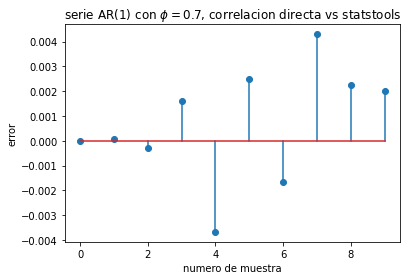

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


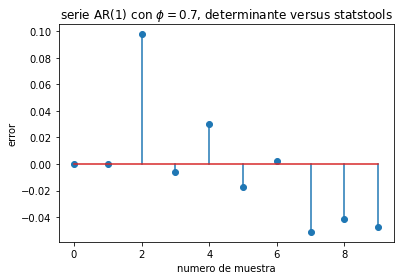

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


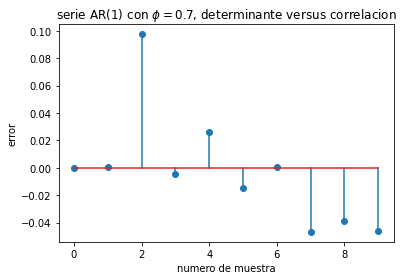

In [18]:
plt.xlabel("numero de muestra")
plt.ylabel("error")
plt.title("serie AR(1) con $\phi=0.7$, correlacion directa vs statstools")
plt.stem(rhomio-rhostattools)
plt.show()

plt.xlabel("numero de muestra")
plt.ylabel("error")
plt.title("serie AR(1) con $\phi=0.7$, determinante versus statstools")
plt.stem(-P+rhostattools)
plt.show()


plt.xlabel("numero de muestra")
plt.ylabel("error")
plt.title("serie AR(1) con $\phi=0.7$, determinante versus correlacion")
plt.stem(rhomio-P)
plt.show()

## Usando Yule-Walker



In [19]:
import statsmodels.api as sm

M=10
PYW = np.zeros(M)

PYW[0]=1
PYW[1]=rho[1]

for k in range(2,M):
    rhoYK, sigma = sm.regression.yule_walker(X, order=k, method='mle')
    PYW[k] = rhoYK[k-1]

PYW

array([ 1.        ,  0.27510897,  0.01580189, -0.03707294,  0.03995428,
       -0.03208682,  0.01092013, -0.04919276, -0.01735821, -0.0234861 ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


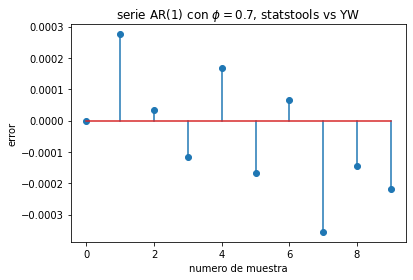

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


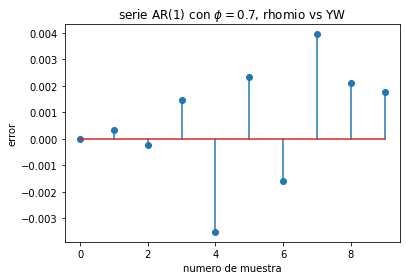

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


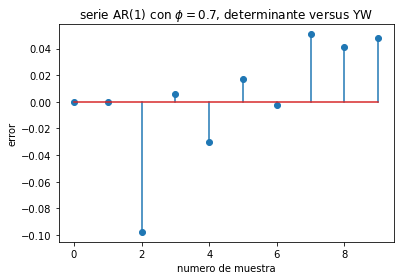

In [20]:
plt.xlabel("numero de muestra")
plt.ylabel("error")
plt.title("serie AR(1) con $\phi=0.7$, statstools vs YW")
plt.stem(rhostattools-PYW)
plt.show()

plt.xlabel("numero de muestra")
plt.ylabel("error")
plt.title("serie AR(1) con $\phi=0.7$, rhomio vs YW")
plt.stem(rhomio-PYW)
plt.show()


plt.xlabel("numero de muestra")
plt.ylabel("error")
plt.title("serie AR(1) con $\phi=0.7$, determinante versus YW")
plt.stem(P-PYW)
plt.show()

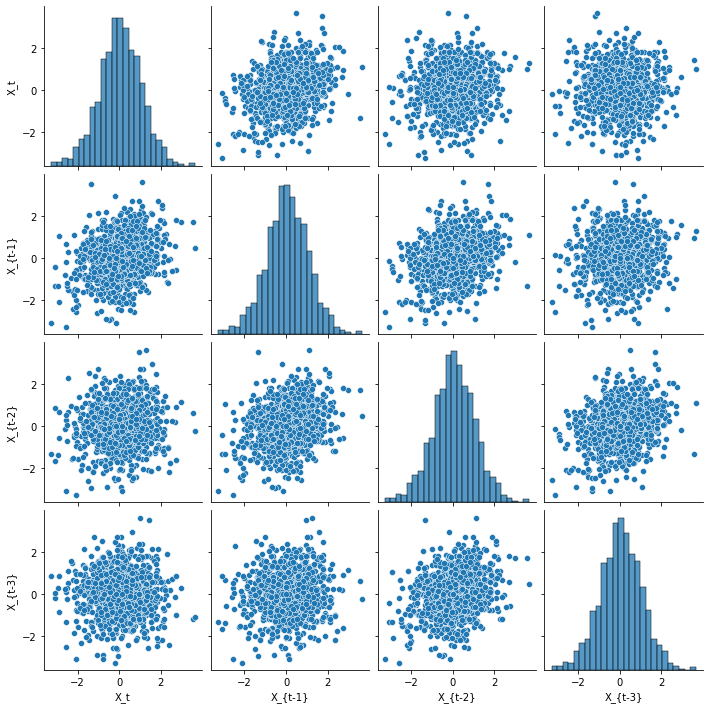

In [22]:
# la matriz de dispersion "scatter"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# construyamos las columnas X_{t-1}, X_{t-2}, \cdots X_{t-k+1}
n  = X.size
k=4
Y=np.zeros( shape=(k,n), dtype='float')

Y[0]=X
for i in range(1, k):
    Y[i][:-i] = X[i:]

# crear un dataframe
data = np.transpose(Y)
df = pd.DataFrame(data)
X1 = "X_t"
X2 = "X_{t-1}"
X3 = "X_{t-2}"
X4 = "X_{t-3}"
df.columns = [X1, X2, X3, X4]

sns.pairplot(df)


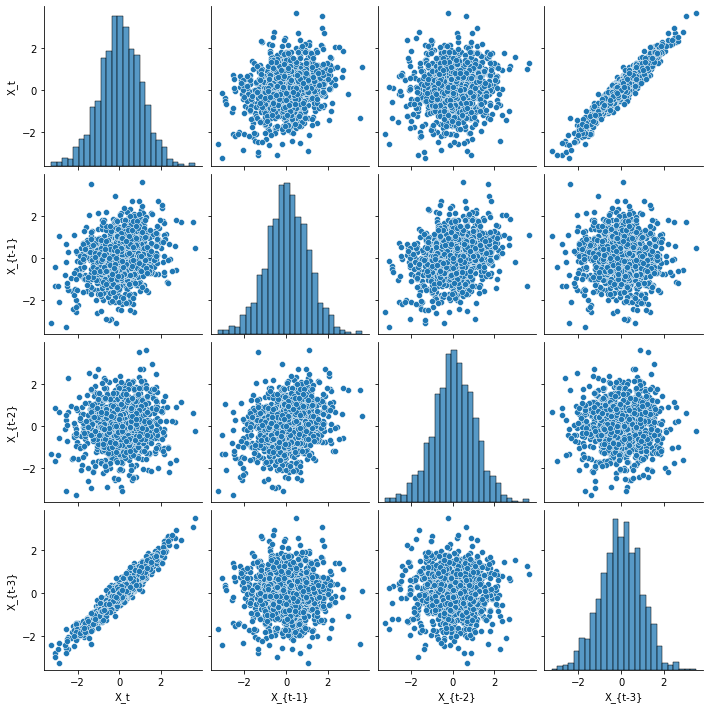

In [24]:
# removemos ruido entre X_t, X_{t-3}
n  = X.size
k=4
Y=np.zeros( shape=(k,n), dtype='float')

Y[0]=X
for i in range(1, k):
    Y[i][:-i] = X[i:]

# removemos el ruido debido a X_{t-1}, X_{t-2}
# columna de unos
ones = np.ones( shape=(n,1), dtype='float')

# stack ones
Xmat = np.column_stack( ( ones, Y[1]))

# los siguientes
for i in range(2,k-1):
    # stack columnas
    Xmat = np.column_stack((Xmat, Y[i]))


# Ax=b -->  x = (A^T A)^{-1} A^T b
XT = Xmat.transpose() # Xmat transpuesta
XTX = XT.dot(Xmat)  # A^T A
XTXInv = np.linalg.inv(XTX) # (A^T A)^{-1}
b = np.matmul(XT, Y[0])
theta = XTXInv.dot(b)

if verbose : print("theta primer paso", theta)


# calcular los residuales
Y_t = X - theta[0] - sum( theta[j]*Y[j] for j in range (1, k-1))

Y[k-1] = Y_t

# crear un dataframe
data = np.transpose(Y)
df = pd.DataFrame(data)
X1 = "X_t"
X2 = "X_{t-1}"
X3 = "X_{t-2}"
X4 = "X_{t-3}"
df.columns = [X1, X2, X3, X4]

sns.pairplot(df)





# Que pasa si la serie no es estacionaria:
## Como se remueve la no estacionarieidad.

Hay dos parametros importantes en este curso: la media y la varianza. La media se pude "corregir" con el operador diferencia y la varianza con funciones. Por ejemplo log. 

En este curso solo corregimos por media (la varianza queda por fuera).

Vamos a estudiar el operador diferencia. Para remover la media.






